##The Street View House Numbers (SVHN) Dataset


SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

http://ufldl.stanford.edu/housenumbers 



In this project, we will use the dataset with images centered around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.


In [21]:
import h5py
import numpy as np
import keras
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
tf.reset_default_graph()
tf.set_random_seed(42)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Dataset

In [0]:
h5f=h5py.File('/content/drive/My Drive/ClassNotes/Project 10 SVHN_single_grey/SVHN_single_grey1.h5','r')

In [0]:
#Load Train, test X, y 
X_train=h5f['X_train'][:]
X_test=h5f['X_test'][:]

y_train=h5f['y_train'][:]
y_test=h5f['y_test'][:]

In [0]:
h5f.close()

In [27]:
print('Train X shape',X_train.shape)   ## there is a total fo 60,000 records of which 42,000 used for training 18000 as test
print('Test shape',X_test.shape)
print('Train y shape',y_train.shape)
print('Train y shape',y_test.shape)

Train X shape (42000, 32, 32)
Test shape (18000, 32, 32)
Train y shape (42000,)
Train y shape (18000,)


In [28]:
y_train.dtype

dtype('uint8')

##One-hot encode the target vector converting target vectors (integers) to binary class matrix - number of classes: 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [30]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:2])

(42000, 10)
First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## Visualizing the first 10 images in the dataset and their labels


label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


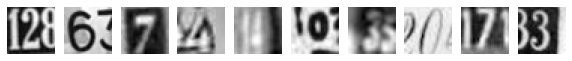

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

## Now before fit lets log the data for TensorBoard

In [0]:
tensorBoard=keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/ClassNotes/Project 10 SVHN_single_grey/SVHN1')

### Initializing the model in Keras and reshaping followed by Batch Normalisation.
### Applying ReLU to hidden dense and Dropout


In [13]:
# Initialize Sequential model
model = keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(keras.layers.BatchNormalization())

# Hidden layers 
model.add(keras.layers.Dense(1000, activation='relu', name='Layer_1'))
# Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation='relu', name='Layer_2'))

# Dropout layer
model.add(keras.layers.Dropout(0.005))
model.add(keras.layers.Dense(250, activation='relu', name='Layer_3'))

# Normalize the data
model.add(keras.layers.BatchNormalization())
# Hidden layers
model.add(keras.layers.Dense(250, activation='relu', name='Layer_4'))
model.add(keras.layers.Dense(100, activation='relu', name='Layer_5'))
# Dropout layer
model.add(keras.layers.Dropout(0.025))
# Hidden layers
model.add(keras.layers.Dense(50, activation='relu', name='Layer_6'))
#Output layer
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compiling the model created and see the model.summary

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000)              4000      
_________________________________________________________________
Layer_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 250)            

## Lets fit the model to train and test data

In [15]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 32) 
 ## it will run in collab

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/50





42000/42000 [==============================] - 25s 588us/step - loss: 1.5084 - acc: 0.4850 - val_loss: 1.0461 - val_acc: 0.6626
Epoch 2/50
42000/42000 [==============================] - 23s 550us/step - loss: 1.0661 - acc: 0.6576 - val_loss: 0.8731 - val_acc: 0.7229
Epoch 3/50
42000/42000 [==============================] - 23s 547us/step - loss: 0.9343 - acc: 0.7028 - val_loss: 0.7974 - val_acc: 0.7521
Epoch 4/50
42000/42000 [==============================] - 23s 550us/step - loss: 0.8468 - acc: 0.7317 - val_loss: 0.6969 - val_acc: 0.7914
Epoch 5/50
42000/42000 [==============================] - 23s 557us/step - loss: 0.7600 - acc: 0.7596 - val_loss: 0.6601 - val_acc: 0.7973
Epoch 6/50
42000/42000 [==============================] - 23s 547us/step - loss: 0.7140 - acc: 0.7735 - val_loss: 0.6278 - val_acc: 0.8053
Epoch 7/50
420

## Finally, looking at the classification accuracy metrics and graph.

In [16]:
score_train = model.evaluate(X_train, y_train,verbose=0)
print("Train Loss=",score_train[0],"; Accuracy=",score_train[1])
score = model.evaluate(X_test, y_test,verbose=0)
print("Test Loss=",score[0],"; Accuracy=",score[1])

Train Loss= 0.09294690461119726 ; Accuracy= 0.9736190476190476
Test Loss= 0.4800873236457507 ; Accuracy= 0.8745


### Clearly this model with 3 Batch Normalization layer, 2 Drop-Out and 6 dense layers, seems overfit, for 50 epochs we got 97 on Train and 87 and train.

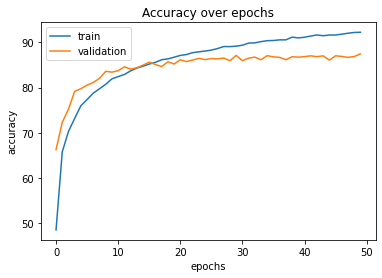

In [17]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

## Lets us try few more models and variation to improve the accuracy

In [33]:
# Initialize Sequential model
model2 = keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model2.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model2.add(keras.layers.BatchNormalization())

# Hidden layers 
model2.add(keras.layers.Dense(1000, activation='relu', name='Layer_1'))
# Normalize the data
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(700, activation='relu', name='Layer_2'))
model2.add(keras.layers.Dense(550, activation='relu', name='Layer_3'))
# Dropout layer
model2.add(keras.layers.Dropout(0.025))
# Hidden layers
model2.add(keras.layers.Dense(300, activation='relu', name='Layer_4'))
model2.add(keras.layers.Dense(100, activation='relu', name='Layer_5'))
# Hidden layers
model2.add(keras.layers.Dense(40, activation='relu', name='Layer_6'))

#Output layer
model2.add(keras.layers.Dense(10, activation='softmax', name='Output'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000)              4000      
_________________________________________________________________
Layer_2 (Dense)              (None, 700)               700700    
_________________________________________________________________
Layer_3 (Dense)              (None, 550)               385550    
_________________________________________________________________
dropout_1 (Dropout)          (None, 550)              

In [34]:
history=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 32) 
 ## it will run in collab

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 23s 557us/step - loss: 0.2293 - acc: 0.9262 - val_loss: 0.5216 - val_acc: 0.8671
Epoch 2/50
42000/42000 [==============================] - 23s 543us/step - loss: 0.2368 - acc: 0.9236 - val_loss: 0.4858 - val_acc: 0.8719
Epoch 3/50
42000/42000 [==============================] - 23s 559us/step - loss: 0.2286 - acc: 0.9258 - val_loss: 0.4925 - val_acc: 0.8715
Epoch 4/50
42000/42000 [==============================] - 23s 553us/step - loss: 0.2285 - acc: 0.9258 - val_loss: 0.5265 - val_acc: 0.8674
Epoch 5/50
42000/42000 [==============================] - 23s 551us/step - loss: 0.2281 - acc: 0.9260 - val_loss: 0.5101 - val_acc: 0.8717
Epoch 6/50
42000/42000 [==============================] - 23s 552us/step - loss: 0.2249 - acc: 0.9273 - val_loss: 0.5130 - val_acc: 0.8713
Epoch 7/50
42000/42000 [==============================] - 23s 550us/step - loss: 0.2247 - acc: 0.9276 - val_loss: 0.

##### In This model2 with 2 Batch Normalization layer, 1 Drop-Out and 6 dense layers, seems overfit, for 50 epochs, we got 95 on Train and 87.5 and train.

In [35]:
score_train = model2.evaluate(X_train, y_train,verbose=0)
print("Train Loss=",score_train[0],"; Accuracy=",score_train[1])
score = model2.evaluate(X_test, y_test,verbose=0)
print("Test Loss=",score[0],"; Accuracy=",score[1])

Train Loss= 0.04329721327228028 ; Accuracy= 0.9896904761904762
Test Loss= 0.5368925941785176 ; Accuracy= 0.8753333333333333


On comparison to Model1(97.3 and 87.4 for train and test),  Using the model2 as above we could improve the Accuracy of train and test to 98.9 and approx 87.5 respectively.